In [1]:
import pandas as pd

In [17]:
df = pd.read_csv('MSRTQps_parsed_combined.csv', names=['microservice_id','time','requests_per_timestep'])
df

,microservice_id,time,requests_per_timestep
0,9c60d021c2c9,12,234.820
1,9c60d021c2c9,23,143.814
2,9c60d021c2c9,16,233.891
3,9c60d021c2c9,0,305.166
4,9c60d021c2c9,6,227.262
...,...,...,...
619623,c4fcfc22f9f0,295,221.377
619624,c4fcfc22f9f0,296,265.820
619625,c4fcfc22f9f0,297,124.375
619626,c4fcfc22f9f0,298,220.510


In [18]:
df_sorted = df.sort_values(by=['microservice_id','time'])
df_sorted

,microservice_id,time,requests_per_timestep
8443,002251d41234,0,28369.20000
8458,002251d41234,1,27845.00000
8454,002251d41234,2,26803.00000
8441,002251d41234,3,27227.20000
8447,002251d41234,4,26720.70000
...,...,...,...
424948,ffe2951a8041,716,9.67857
424949,ffe2951a8041,717,12.24440
424950,ffe2951a8041,718,11.67840
424925,ffe2951a8041,719,13.25320


In [83]:
ms_sufficient_load = (df_sorted.groupby('microservice_id')['requests_per_timestep'].mean() > 500)
ms_sufficient_load = ms_sufficient_load[ms_sufficient_load]
ms_sufficient_load

microservice_id
002251d41234    True
0132c76602ca    True
01371e5f86d7    True
02545c66e407    True
05926ffecaf1    True
                ... 
fdfb8ee968d1    True
fe934f726a87    True
feb016414e7b    True
fee12ebec280    True
ffbe372c880b    True
Name: requests_per_timestep, Length: 309, dtype: bool

In [146]:
# Chosen simulated load traces over 12 hours:
# c7dfeef2c031
# 63b8a25a4a9f (scale down down to 20% of load)
# 3b40e01c9ae5 (scale down to 90% of load)
# 70d6477dee4d (scale up load to 150%)
# 93f9fc4fcdba
# af5d63e40f2b
# d4c16d4a3f24

d4c16d4a3f24


/tmp/ipykernel_3209/1020224179.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rand_ms_df = df_sorted[df['microservice_id'] == rand_ms]


<Axes: title={'center': 'Requests received by microservice "d4c16d4a3f24"'}, xlabel='minute', ylabel='requests per minute'>

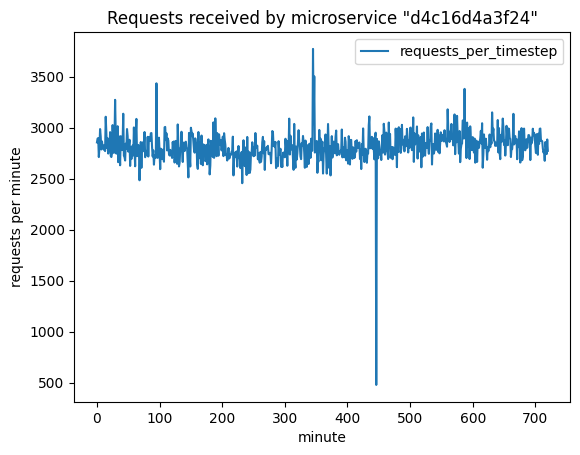

In [143]:
# rand_ms = df[ms_sufficient_load].sample().values[0]
rand_ms = ms_sufficient_load.sample().keys()[0]
print(rand_ms)
rand_ms_df = df_sorted[df['microservice_id'] == rand_ms]

rand_ms_df.plot(
    x='time', y='requests_per_timestep',
    xlabel='minute', ylabel='requests per minute',
    title=f'Requests received by microservice "{rand_ms}"'
)

<Axes: >

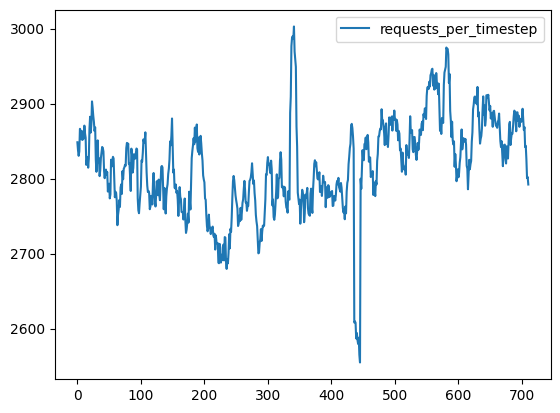

In [145]:
rand_ms_df['requests_per_timestep'].rolling(window=10).mean()[10:].reset_index().plot(y='requests_per_timestep')